In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

### Задание 1

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

In [2]:
from sklearn import datasets
df = datasets.load_boston()

In [3]:
X = pd.DataFrame(df.data, columns = df.feature_names)
y = pd.DataFrame(df.target, columns = ['price'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [6]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = df.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = df.feature_names)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [7]:
from sklearn.manifold import TSNE

In [8]:
tnse = TSNE (n_components=2, learning_rate=250, random_state=42)
X_train_tnse = tnse.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

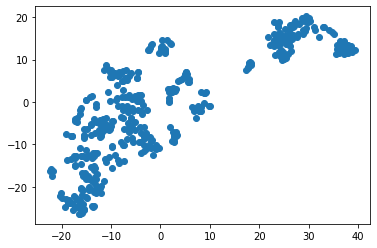

In [9]:
plt.scatter(X_train_tnse[:,0], X_train_tnse[:,1]);

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [10]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters=3, max_iter = 100, random_state=42)

In [14]:
X_train_kmeans = model.fit_transform(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

In [18]:
X_train_tnse_kmeans = tnse.fit_transform(X_train_kmeans)

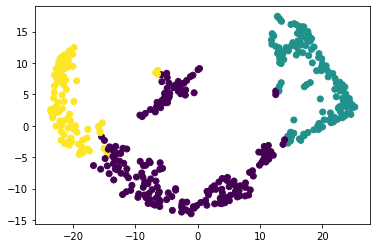

In [19]:
plt.scatter(X_train_tnse_kmeans[:, 0], X_train_tnse_kmeans[:, 1], c=model.labels_);

### Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [21]:
labels_test = model.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [22]:
X_test_scaled['labels_test'] = labels_test

In [23]:
display(X_test_scaled.loc[X_test_scaled['labels_test'] == 0]['CRIM'].mean(),
X_test_scaled.loc[X_test_scaled['labels_test'] == 1]['CRIM'].mean(),
X_test_scaled.loc[X_test_scaled['labels_test'] == 2]['CRIM'].mean())

-0.4508131427450952

0.8803216939327015

-0.47839399382342146

In [24]:
# не очень понимаю, что за предупредждение и с чем оно связано. 
y_test['labels_test'] = labels_test

C:\Users\Пользователь\.conda\envs\Pyton study\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
display(y_test[labels_test == 0]['price'].mean(), y_test[labels_test == 1]['price'].mean(),
        y_test[labels_test == 2]['price'].mean())

22.031111111111112

16.437142857142856

28.413636363636364